# Vamos utilizar machine learning para responder a seguinte pergunta:

## "Vamos investir 75k em marketing, qual deve ser o estoque enviado para a loja?



In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [10]:
tabela = pd.read_excel("Investimento_x_Venda.xlsx")

In [14]:
tabela.head(10)

,Investimento em marketing,Venda Qtd
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295
5,72,335
6,81,364


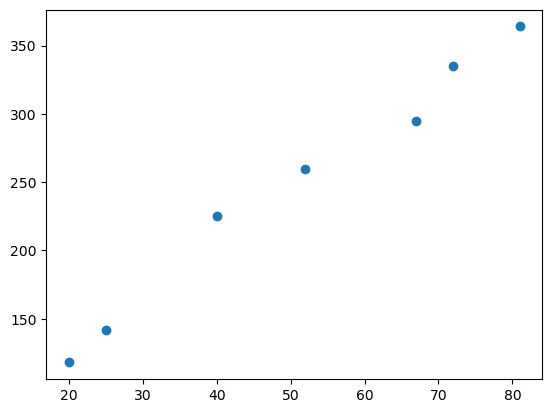

In [26]:
#Visualizando graficamente
plt.scatter(tabela["Investimento em marketing"], tabela["Venda Qtd"])
plt.show()

### Podemos perceber pelo grafico, que existe um relaciomento linear entre marketing e vendas, nos dando a dica de que podemos utilizar o modelo gaussiano dos metodos dos mínimos quadrados, na forma de um algoritmo de regressão linear, esse método consiste em descobrir a "melhor reta" que para representar a relação entre os dados, podendo a partir dela prever para qualquer valor

# Podemos à grosso modo passar uma reta de maneira conveniente ao grafico e então inferir as previsões

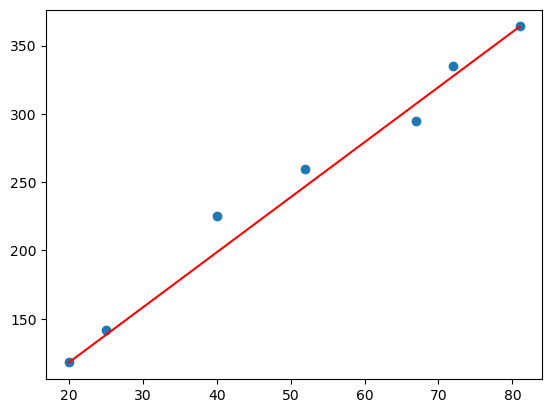

In [27]:
plt.scatter(tabela["Investimento em marketing"], tabela["Venda Qtd"])
#Estamos utilizando o conhecimento matematico, de que para respresentarmos uma reta
#precisamos de dois pontos, pois assim podemos calcular sua declividade
X0 = tabela["Investimento em marketing"][0]
Y0 = tabela["Venda Qtd"][0]
X1 = tabela["Investimento em marketing"][6]
Y1 = tabela["Venda Qtd"][6]
plt.plot([X0,X1],[Y0,Y1], "r")
plt.show()

# Usando a equação da reta para determinar a venda

## y = ax + b

In [23]:
def findY(x_reta,y_reta,x):
    #Declividade da reta
    a = (y_reta[1] - y_reta[0])/(x_reta[1] - x_reta[0])
    #Coeficente linear da reta
    b = y_reta[1] - (a * x_reta[1])
    y = a*x + b
    return y

In [24]:
findY([X0,X1],[Y0,Y1], 75)

339.8032786885246

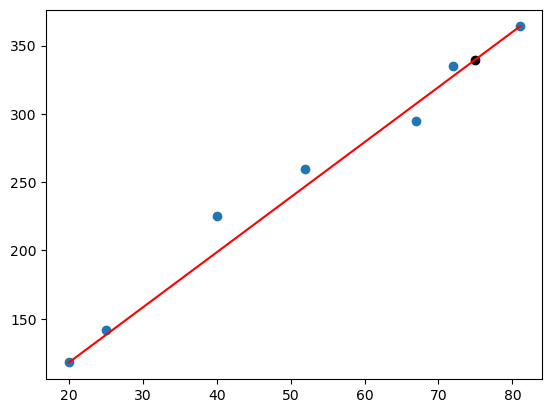

In [25]:
plt.scatter(tabela["Investimento em marketing"], tabela["Venda Qtd"])
plt.scatter(75,findY([X0,X1],[Y0,Y1], 75),color="k")
X0 = tabela["Investimento em marketing"][0]
Y0 = tabela["Venda Qtd"][0]
X1 = tabela["Investimento em marketing"][6]
Y1 = tabela["Venda Qtd"][6]
plt.plot([X0,X1],[Y0,Y1], "r")
plt.show()

## Bom conseguimos calcular utilizando nossos conhecimentos de geometria analitica, mas sera que existe um jeito mais automatizado de fazer isso? ou melhor se existe um algoritmo que calcule varias retas e veja qual tem a menor taxa de erro, afinal nem sabemos se a nossa reta é a melhor possivel, como so testamos uma possibilidade, provalvelmente não é, mas para isso o python vai nos ajudar

# Vamos usar o Machine Learning

In [34]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(tabela["Investimento em marketing"].values.reshape(-1,1),tabela["Venda Qtd"])

LinearRegression()

In [35]:
reg.intercept_

49.20032351438786

In [36]:
reg.coef_

array([3.90643623])

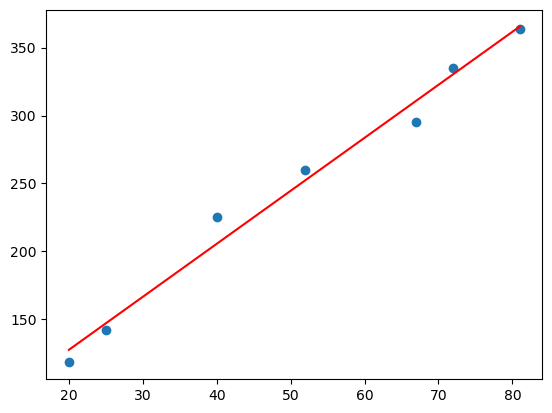

In [39]:
plt.scatter(tabela["Investimento em marketing"], tabela["Venda Qtd"])
X = np.array(tabela["Investimento em marketing"])
Y = X*reg.coef_ + reg.intercept_
plt.plot(X,Y,"r")
plt.show()

In [40]:
reg.predict([[75]])

array([342.18304104])

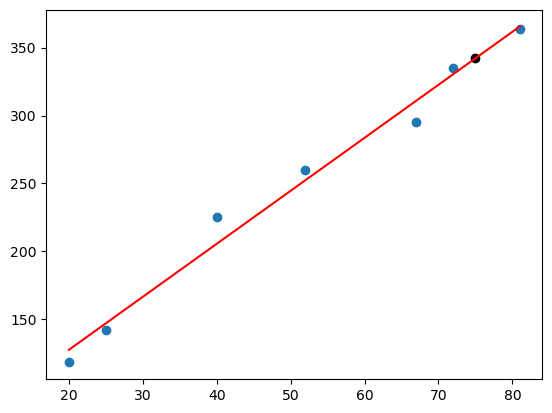

In [44]:
plt.scatter(tabela["Investimento em marketing"], tabela["Venda Qtd"])
plt.scatter(75,reg.predict([[75]]),color="k")
X = np.array(tabela["Investimento em marketing"])
Y = X*reg.coef_ + reg.intercept_
plt.plot(X,Y,"r")
plt.show()